In [1]:
import tensorflow as tf


Import MNIST Dataset
which is hand written number

In [3]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data() # (training set, labels)
# here all variables are numpy array

11490434/11490434 [==============================] - 0s 0us/step


Shapes of imported Array

In [5]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

# 60000 is number of example (image) in this array, each example has 28 rows and 28 columns
# im image example 28 pixels height and 28 pixels width
# similarly for test

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


# Plot an Image Example

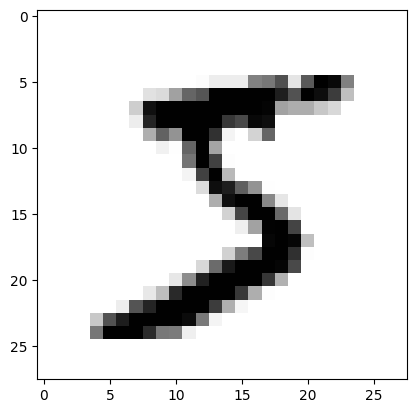

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
# change matplot mode

plt.imshow(x_train[0], cmap='binary')  #chnage color mode to binary for black and white image
plt.show()

# Display Labels

In [9]:
y_train[0]   #print the image actually is

5

In [11]:
print(set(y_train)) # print unique labels

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# One Hot Encoding
chnage the origin labels to one hot encoding

## Encoding Labels

In [12]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

Validated Shapes

In [13]:
print('y_train_encoded shape: ', y_train_encoded.shape)   # 60000 is images labels and 10 is used to represent each one hot encoded
print('y_test_encoded shape: ', y_test_encoded.shape)

y_train_encoded shape:  (60000, 10)
y_test_encoded shape:  (10000, 10)


Display Encoded Labels

In [14]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
y_train[0]  #actual value

5

# **Neural Networks**

**Linear Equation**
<br>
y = w1x1 + w2x2 + ....... +b <br>
Y= W.X + b <br>
X=[x1, x2, x3,.....]^T


**Prepocessing** <br>
Unrolling N-dimensioanl Array to vectors


In [16]:
import numpy as np

x_train_reshaped = np.reshape(x_train, (60000, 784)) # desired shape is second argument
x_test_reshaped = np.reshape(x_test, (10000, 784))

print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)

# each element is now 784 dimension vector
# and each value in this vector is corresponding to pixel value of image

x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


Display pixel values

In [17]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


Data Normalization

In [21]:
x_mean = np.mean(x_train_reshaped) # mean value
x_std = np.std(x_train_reshaped)  # standard deviation

print('mean: ', x_mean)
print('std: ', x_std)

epsilon = 1e-10

x_train_norm = (x_train_reshaped - x_mean)/(x_std + epsilon) # here x_train_reshaped is vector
x_test_norm = (x_test_reshaped - x_mean)/(x_std + epsilon)
# very small value of x_std leads to (1/0)unstability computation and adding another small value to solve the problem

mean:  33.318421449829934
std:  78.56748998339798


Display Normalized Pixel Values

In [22]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

# **Creating a Model**

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([ #input layer is actual input
    Dense(128, activation='relu', input_shape=(784,)), #hidden
    Dense(128, activation='relu'), #hidden
    Dense(10, activation='softmax') # output
])

compiling model

In [26]:
model.compile(
    optimizer='sgd', #Stochastic Gradient Descent
    loss='categorical_crossentropy', #10 numbers category, minimizes the loss function
    metrics=['accuracy']
)

In [28]:
model.summary()

#here last 10 are b
# param is learnable parameter

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **Training the Model**

In [29]:
model.fit(
    x_train_norm,
    y_train_encoded,
    epochs=3
)

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3828 - accuracy: 0.8880
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1896 - accuracy: 0.9455
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1431 - accuracy: 0.9583


Evaluating the **model**

In [31]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)

print('Test set accuracy in percentage', accuracy*100)

313/313 [==============================] - 1s 2ms/step - loss: 0.1362 - accuracy: 0.9593
Test set accuracy in percentage 95.92999815940857


# **Predictions**

In [32]:
preds = model.predict(x_test_norm)
print('shape of preds: ', preds.shape)


313/313 [==============================] - 1s 2ms/step
shape of preds:  (10000, 10)


**Plot the result**

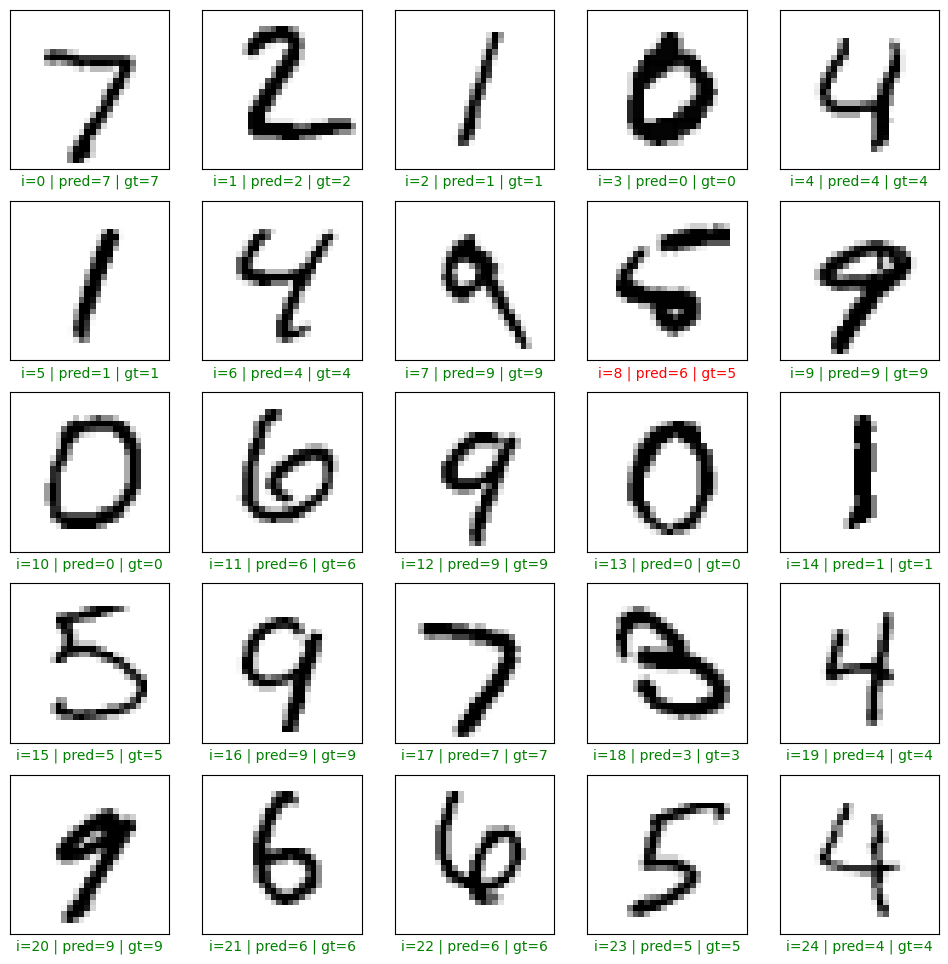

In [36]:
plt.figure(figsize=(12,12))

start_index = 0

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  pred = np.argmax(preds[start_index + i])
  gt = y_test[start_index + i] # ground truth

  col = 'g' # color green
  if pred != gt:
    col = 'r'

  plt.xlabel('i={} | pred={} | gt={}'.format(start_index + i, pred, gt), color=col)
  plt.imshow(x_test[start_index+i], cmap='binary')

plt.show()

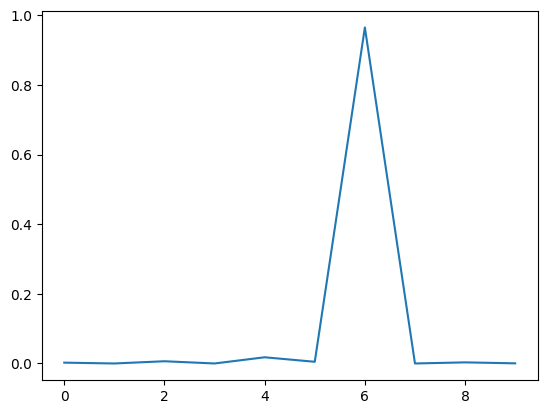

In [38]:
# index=8 predicting wrong

plt.plot(preds[8])
plt.show()

#shows 6 is higher probality to accurate